# Tomatoe Bight Projecct

## Imports

In [1]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt
from pathlib import Path

print("Tensorflow version",tf.__version__)
print("Numpy version",np.__version__)
print("Matplolib version",tf.__version__)

from tensorflow.keras.preprocessing.image import ImageDataGenerator
BASE_DIR = Path().resolve()
print(BASE_DIR)

Tensorflow version 2.9.1
Numpy version 1.23.1
Matplolib version 2.9.1
E:\BlightProject_CNN


## Obtain data

In [ ]:
from utils import ProcessingUtils
link = "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip"
file_name = "validation-horse-or-human"
utilob = ProcessingUtils()

utilob.zipfileDownload(link,file_name)

### Read zipfile

In [4]:
utilob.readZipFile(file_name, "data/test")

Starting validation-horse-or-human file read
Completed validation-horse-or-human file read into data/test


## Load images, Image Augmentation

### ImageDataGenerator Object

In [2]:
# ImageDataGenerator Object

DataGenerator = ImageDataGenerator(
 rescale=1./255,
 rotation_range=40, # Rotating each image randomly up to 40 degrees left or right
 width_shift_range=0.2, # Translating the image up to 20%  horizontally
 height_shift_range=0.2, #  Translating the image up to 20% vertically 
 shear_range=0.2, # Shearing the image by up to 20%
 zoom_range=0.2, # Shearing the image by up to 20%
 horizontal_flip=True, # 
 fill_mode='nearest' # Filling in any missing pixels after a move or shear with nearest neighbors
)

### training

In [3]:
training_dir = "resized"
validation_dir = "resized"
test_dir = "resized"

train_gen = DataGenerator


train_generator = train_gen.flow_from_directory(
    training_dir,
    target_size=(450,674),
    subset ="training",
    class_mode = 'binary'
)



Found 524 images belonging to 2 classes.


### validation

In [4]:
validation_gen = DataGenerator


validation_generator = validation_gen.flow_from_directory(
    validation_dir,
    target_size=(450,674),
    subset ="validation",
    class_mode = 'binary'
)

Found 0 images belonging to 2 classes.


### test

In [7]:
test_gen = DataGenerator

test_generator = test_gen.flow_from_directory(
    test_dir,
    target_size=(450,674),
    class_mode = 'binary'
)

Found 524 images belonging to 2 classes.


## Convolution Neural Network Model

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation = "relu", input_shape =(450,674,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation = "relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation = "relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation = "relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation = "relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation = "relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(32,activation="relu"),
    tf.keras.layers.Dense(1)
])
model.summary()
model.build()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 448, 672, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 224, 336, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 222, 334, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 111, 167, 64)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 109, 165, 64)      36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 54, 82, 64)       0

## Model compiling

In [9]:
model.compile(
    optimizer='adam',
    loss = 'binary_crossentropy',
    metrics=['accuracy']
)


## Model training and validation

In [10]:
train_history=model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

Epoch 1/10


### save model

In [28]:
# import os

utilob.saveModel(BASE_DIR,model)
# next_version=len(os.listdir("saved_models"))+1
# name = f"saved_models/tomatoe_blight_model_version_{next_version}.h5"
# model.save(name)

E:\BlightProject_CNN\saved_models/tomatoe_blight_model_version_3.h5


## History train plots

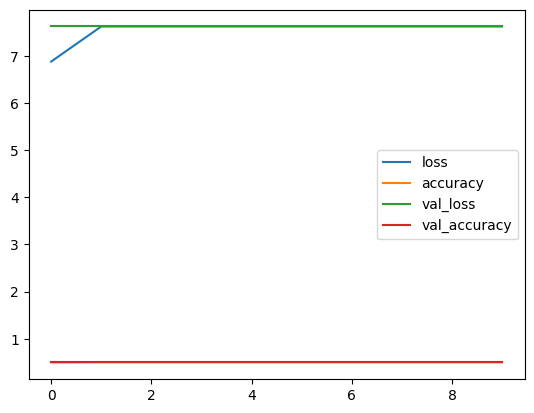

In [29]:
# dir(train_history)
# print(train_history.params)
# print(train_history.epoch)
# train_history.history.keys()
# loss = train_history.history['loss']
# print(train_history.epoch)

legend = []
for i in train_history.history.keys():
    legend.append(i)
    data = train_history.history[i]
    plt.plot(train_history.epoch,data)
plt.legend(legend)

## Model evaluation

In [1]:
model.evaluate(test_generator)

NameError: name 'model' is not defined

## File upload for prediction

In [12]:
from ipywidgets import FileUpload
from IPython.display import display
upload = FileUpload(accept='.jpg', multiple=True)

display(upload)


ModuleNotFoundError: No module named 'ipywidgets'

In [34]:
tf.keras.utils.plot_model(model,'model.png',show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
